<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Loading and preparing the dataset
# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:03<00:00, 49.6MB/s]


# Define classes for CIFAR-10

Sample training images:


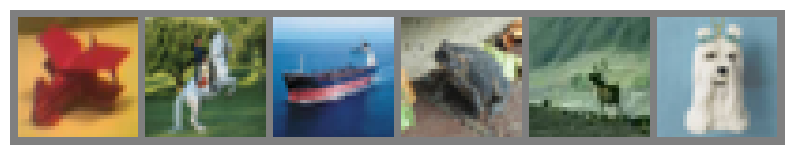

Labels: plane horse  ship  frog  deer   dog


In [2]:

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
print('Sample training images:')
imshow(torchvision.utils.make_grid(images[:6]))
print('Labels:', ' '.join('%5s' % classes[labels[j]] for j in range(6)))

# Task 2: Designing the CNN Architecture

In [3]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # (32x32x3) -> (32x32x32)
        # First pooling layer
        self.pool1 = nn.MaxPool2d(2, 2)  # (32x32x32) -> (16x16x32)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # (16x16x32) -> (16x16x64)
        # Second pooling layer
        self.pool2 = nn.MaxPool2d(2, 2)  # (16x16x64) -> (8x8x64)
        # Third convolutional layer
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # (8x8x64) -> (8x8x128)
        # Third pooling layer
        self.pool3 = nn.MaxPool2d(2, 2)  # (8x8x128) -> (4x4x128)
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # Flattened output to 512
        self.fc2 = nn.Linear(512, 10)  # 10 output classes
        # Dropout for regularization
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Apply conv layers with ReLU and pooling
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        # Flatten the output for the fully connected layer
        x = x.view(-1, 128 * 4 * 4)
        # Apply dropout for regularization
        x = self.dropout(x)
        # Apply fully connected layers with ReLU
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Create the model
model = CNN()
print(model)

# Test the model with a batch
sample_batch = next(iter(trainloader))[0]
output = model(sample_batch)
print(f"Output shape: {output.shape}")

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
Output shape: torch.Size([64, 10])


# Task 3: Training the CNN Model

Training on: cpu
Starting training...
[Epoch 1, Batch 100] loss: 1.923
[Epoch 1, Batch 200] loss: 1.566
[Epoch 1, Batch 300] loss: 1.458
[Epoch 1, Batch 400] loss: 1.382
[Epoch 1, Batch 500] loss: 1.315
[Epoch 1, Batch 600] loss: 1.240
[Epoch 1, Batch 700] loss: 1.195
[Epoch 2, Batch 100] loss: 1.077
[Epoch 2, Batch 200] loss: 1.053
[Epoch 2, Batch 300] loss: 1.054
[Epoch 2, Batch 400] loss: 0.993
[Epoch 2, Batch 500] loss: 0.995
[Epoch 2, Batch 600] loss: 0.980
[Epoch 2, Batch 700] loss: 0.944
[Epoch 3, Batch 100] loss: 0.840
[Epoch 3, Batch 200] loss: 0.851
[Epoch 3, Batch 300] loss: 0.860
[Epoch 3, Batch 400] loss: 0.840
[Epoch 3, Batch 500] loss: 0.835
[Epoch 3, Batch 600] loss: 0.826
[Epoch 3, Batch 700] loss: 0.799
[Epoch 4, Batch 100] loss: 0.744
[Epoch 4, Batch 200] loss: 0.708
[Epoch 4, Batch 300] loss: 0.737
[Epoch 4, Batch 400] loss: 0.733
[Epoch 4, Batch 500] loss: 0.722
[Epoch 4, Batch 600] loss: 0.696
[Epoch 4, Batch 700] loss: 0.715
[Epoch 5, Batch 100] loss: 0.627
[Epoc

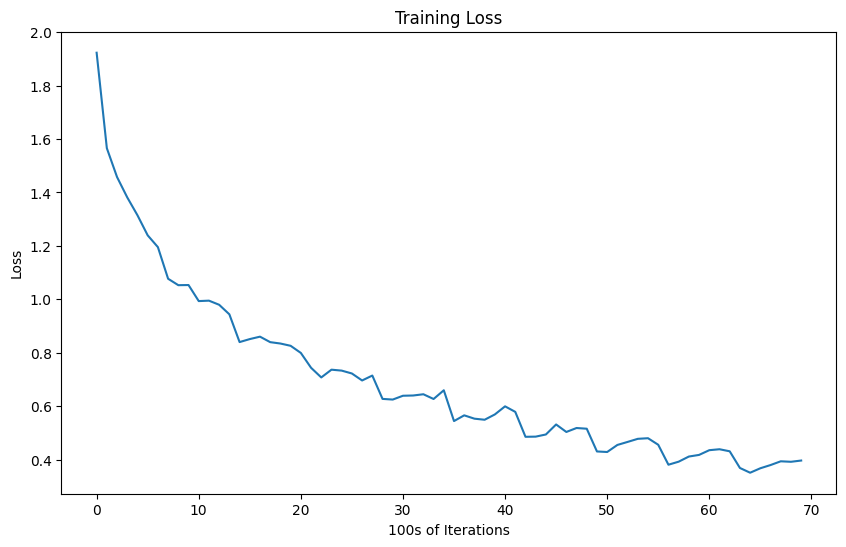

In [4]:

# Choose loss function and optimizer
# CrossEntropyLoss is suitable for multi-class classification,
# as it combines Softmax and Negative Log Likelihood Loss.
criterion = nn.CrossEntropyLoss()

# Define learning rate
LEARNING_RATE = 0.001

# Define the optimizer # Adam is an adaptive learning rate optimizer,
# generally a good default choice. # It updates model parameters based on # gradients.
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on: {device}")

# Move model to device
model.to(device)

# Number of epochs
num_epochs = 10
train_losses = []

# Training loop
print("Starting training...")
for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels, and move them to the device
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track statistics
        running_loss += loss.item()

        # Print statistics every 100 mini-batches
        if i % 100 == 99:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            train_losses.append(running_loss / 100)
            running_loss = 0.0

print('Training complete!')

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('100s of Iterations')
plt.ylabel('Loss')
plt.show()

# Task 4: Evaluating Model Performance

Accuracy on 10,000 test images: 77.94%
Accuracy of plane: 88.30%
Accuracy of car: 91.50%
Accuracy of bird: 62.30%
Accuracy of cat: 57.90%
Accuracy of deer: 74.70%
Accuracy of dog: 70.70%
Accuracy of frog: 82.90%
Accuracy of horse: 84.60%
Accuracy of ship: 83.40%
Accuracy of truck: 83.10%


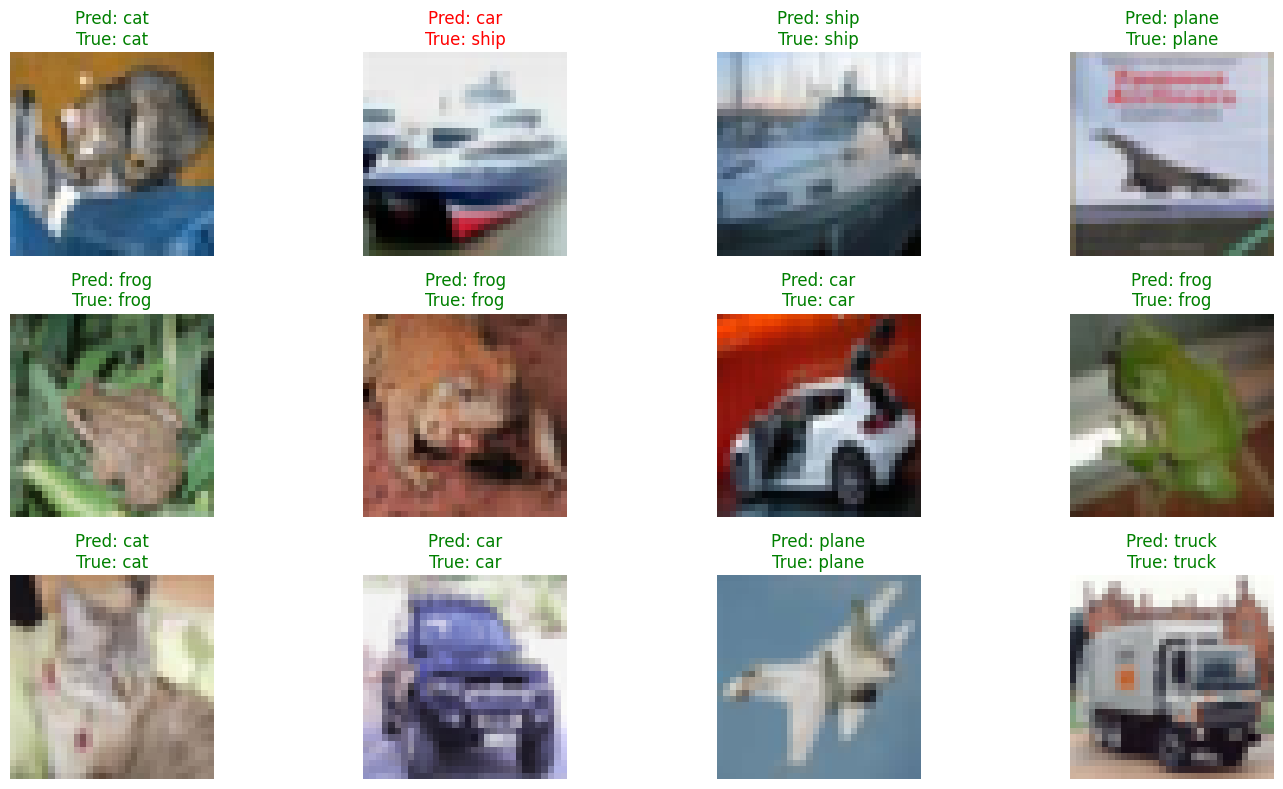

Model saved as 'cifar10_cnn.pth'


In [5]:

# Evaluate on test set
model.eval()  # Set to evaluation mode
correct = 0
total = 0

# Class-wise accuracy
class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Class accuracy
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1

# Overall accuracy
print(f'Accuracy on 10,000 test images: {100 * correct / total:.2f}%')

# Per-class accuracy
for i in range(10):
    print(f'Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]:.2f}%')

# Visualize some predictions
model.eval()
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Move images and predictions back to CPU for visualization
images = images.cpu()
predicted = predicted.cpu()
labels = labels.cpu()

# Show images with predictions
plt.figure(figsize=(15, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    imshow_single = lambda img: plt.imshow(np.transpose(img.numpy() / 2 + 0.5, (1, 2, 0)))
    imshow_single(images[i])
    color = 'green' if predicted[i] == labels[i] else 'red'
    plt.title(f'Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Save the model
torch.save(model.state_dict(), 'cifar10_cnn.pth')
print("Model saved as 'cifar10_cnn.pth'")